<font size='5'>
Machine Learning Homework 4 </br>
Practical Question </br>
Ali Abbasi </br>
98105879
</font>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv("data.csv", index_col=0)
data.head()

,X1,X2,Y
0,0.004291,-0.174600,-1
1,2.225050,0.117181,1
2,0.274173,-0.514910,-1
3,-1.045133,-0.798009,1
4,1.611457,0.239339,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

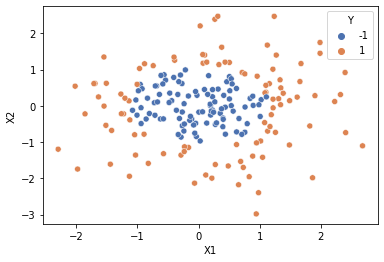

In [2]:
sns.scatterplot(data=data, x = 'X1', y = 'X2', hue = 'Y', palette='deep')

Splitting data to training and test using 80% of data as training data and the rest as testing data:

In [3]:
# splitting data to training and test
# using 80% of data as training data and the rest as testing data
mask = np.random.rand(len(data)) <= 0.8
training_data = data[mask]
testing_data = data[~mask]


Adaboost class gets features and target and trains on them and can predict on new datas:

In [4]:
class Adaboost:
    def __init__(self, features, target):
        self.features = features
        self.target = target
        self.n = len(features)
        self.weights = []
        self.models = []

    def fit(self, number_of_weak_learners):
        w = np.ones(self.n) / self.n
        for m in range(number_of_weak_learners):
            weak_learner = DecisionTreeClassifier(criterion='entropy', max_depth=1)
            weak_learner.fit(self.features, self.target, w)
            prediction = weak_learner.predict(self.features)
            
            # calculate next w
            indicator = prediction != self.target
            epsilon = sum(w * indicator) / sum(w)
            alpha = np.log((1 - epsilon) / epsilon) / 2
            normalization_factor = 2 * np.sqrt((1 - epsilon) * epsilon)
            w = w * np.exp(- alpha * self.target * prediction) / normalization_factor

            self.weights.append(alpha)
            self.models.append(weak_learner)

    
    def predict(self, X):
        result = np.zeros(len(X))
        for weight, model in zip(self.weights, self.models):
            result += weight * model.predict(X)
        return np.sign(result)


Note that we have set max_depth of DecisionTreeClassifier to 1 so that it becomes a weak learner.

Because it's not mentioned to use how many weak learners, we use 30 of them (this could be changed easily if cell below)

In [5]:
# training on traning_data
X = training_data[['X1', 'X2']]
target = training_data['Y']
ada_model = Adaboost(X, target)
ada_model.fit(30)

<AxesSubplot:xlabel='X1', ylabel='X2'>

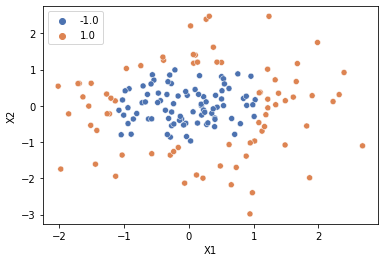

In [6]:
# prediction of model on traning data
training_predict = ada_model.predict(training_data[['X1', 'X2']])
sns.scatterplot(data=training_data, x = 'X1', y = 'X2', hue = training_predict, palette='deep')

<AxesSubplot:title={'center':'correctly classified datapoints'}, xlabel='X1', ylabel='X2'>

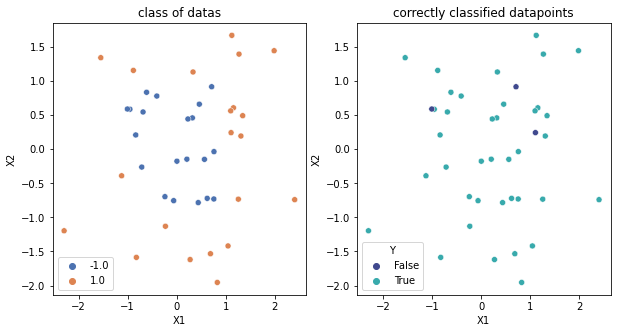

In [7]:
# prediction of model on test data
test_predict = ada_model.predict(testing_data[['X1', 'X2']])
test_target = testing_data['Y']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=testing_data, x = 'X1', y = 'X2', hue = test_predict, palette='deep', ax=axes[0])
axes[0].title.set_text('class of datas')
axes[1].title.set_text('correctly classified datapoints')
sns.scatterplot(data=testing_data, x = 'X1', y = 'X2', hue = test_predict == test_target, palette='mako', ax=axes[1])

And calculating percentage of datapoints that are correctly classified as accuracy:

In [8]:
# calculating accuracy on test data:
right_classification = sum(test_target == test_predict)
accuracy = right_classification / len(test_target) * 100
print(f'Accuracy is {accuracy:.2f}% on testing data ({right_classification} out of {len(test_target)} data)')

Accuracy is 92.68% on testing data (38 out of 41 data)
